1. **```定义```**：<br>
    - 在互联网中自动采集与整理数据信息<br>
    <br>
2. **```可行性```**：<br>
    - <u>有权限</u>，如果没有权限，便不能爬取，例如银行的后台数据
    - <u>能看到</u>，一些小众论坛只有在登录情况下才能查看，那么需要模拟登录，让电脑“看得到”数据
3. **```伦理```**：<br>
    - 除了一般的研究伦理，如果爬取的是<u>特定地区的论坛</u>，研究报告时可能需要匿名化处理。

## 基本思路

|**步骤**|任务|说明|方法|
|:----:|:----:|:-----|:----:|
|**1**|**生成网址**|分析**<mark>网址规律</mark>**，批量生成网址|for循环，format函数|
|2|请求+获取网页数据|模拟人工打开网页，并将网页存储为数据对象|requests包|
|**3**|**解析数据**|分析数据规律，整理出所需字段|**<mark>pyquery包</mark>**，json包<br>（还有**<mark>lxml包和beautifulsoup4包</mark>**）|
|4|存储数据|使用csv包将数据存储到csv文件中|csv包|
|5|批量爬取|对所有网址循环步骤2-4|for循环|

# 生成网址

## 分析网址规律

1. **```任务对象```**：
    - https://book.douban.com/tag/哲学<br>
<br>
<br>
2. **```基本情况```**：
    - 每翻一页，网址中的某个**<u>```数字发生规律性变化```</u>**
    - 每页20本书的信息，最多翻到50页

3. **```规律```**：
- **<u>```原网址```</u>**：
    * https://book.douban.com/tag/哲学?start=0&type=T
    * https://book.douban.com/tag/哲学?start=20&type=T
    * https://book.douban.com/tag/哲学?start=40&type=T
    * https://book.douban.com/tag/哲学?start=60&type=T
    * ……
    * https://book.douban.com/tag/哲学?start=960&type=T
    * https://book.douban.com/tag/哲学?start=980&type=T<br>
<br>
- **<u>```总结规律```</u>**：
    * 第1页，数字为0
    * 第2页，数字为20
    * 第3页，数字为40
    * 第4页，数字为60
    * ……
    * 第49页，数字为960
    * 第50页，数字为980
<br>
<br>
    * <mark><big>第p页，数字为(p-1)*20</big></mark>

## 批量生成网址

In [ ]:
# 尝试用format替换数字
'https://book.douban.com/tag/哲学?start={num}&type=T'.format(num=100)
# 'https://book.douban.com/tag/哲学?start={num}&type=T'.format(num=0)   # num取0
# {}是占位符，这个占位符会被format中的参数值替换。
# 在Python中，.format()方法是一种非常灵活和强大的字符串格式化工具。
# 它允许你在字符串中插入和格式化变量。.format()方法可以与任何字符串一起使用，并通过大括号{}来指定需要插入变量的位置。

In [ ]:
'https://book.douban.com/tag/哲学?start={num}&type=T'.format(num=20)  # num取20

In [ ]:
# 简写
template = 'https://book.douban.com/tag/哲学?start={num}&type=T'
template.format(num=20)

In [ ]:
# 循环生成网址，并存入网址列表中
url_list = []    # 生成空列表，用于存储网址
template = 'https://book.douban.com/tag/哲学?start={num}&type=T'
for p in range(1,11):   # range取1到50，因豆瓣限制50页
    url = template.format(num=(p-1)*20)    # 取1时，为(1-1)*20，即num为0，以此类推
    url_list.append(url)   # 将上面获得的url【添加进】列表

In [ ]:
# 查看url_list情况（获得50页的网址）
url_list

In [ ]:
# 定义函数 generate_url_list()
# 返回值：url_list为网址列表
def generate_url_list():   # 添加：定义函数名
    url_list = []
    template = 'https://book.douban.com/tag/哲学?start={num}&type=T'
    for p in range(1,6):
        url = template.format(num=(p-1)*20)
        url_list.append(url)
    return url_list        # 添加：返回网址列表

In [ ]:
# 调用函数  generate_url_list()
url_list_tmp = generate_url_list()
url_list_tmp

# 请求+获取网页数据	

- 以第1页为例，来请求并获取网页数据
- 例子：https://book.douban.com/tag/哲学?start=0&type=T

In [ ]:
import requests   # 导入requests包

url = 'https://book.douban.com/tag/哲学?start=0&type=T'
resp = requests.get(url)   # 用get向服务器请求获取数据
resp # 查看状态码，返回码418说明访问不成功，需要伪装访问，假装是人工打开网页

1. **```状态码```**：
    * 1开头：信息状态码
    * 2开头：成功状态码
    * 3开头：重定向状态码
    * 4开头：客户端错误状态码
    * 5开头：服务端错误状态码

In [ ]:
resp.text

2. **```应对方式```**：加入请求头headers，一般包括user-agent、cookie和referer等
    * **<u>```user-agent```</u>**：浏览器类型及版本、操作系统及版本、浏览器内核等的信息标识
    * **<u>```cookie```</u>**：用于识别用户身份、记录历史的一段数据（浏览器访问服务器后，服务器传给浏览器的）
    * **<u>```referer```</u>**：告诉服务器该网页是从哪个页面链接过来的

In [ ]:
# 尝试加入user-agent
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)   \
                           AppleWebKit/537.36 (KHTML, like Gecko)  \
                           Chrome/92.0.4515.131 Safari/537.36'}
# “\”是用来分行的，代表虽然代码按照几行书写，但实际上是一行
# User-Agent字符串的各部分解释：  
# Mozilla/5.0：历史原因，很多浏览器都以此开头，表明它们兼容Mozilla浏览器  
# (Windows NT 10.0; Win64; x64)：操作系统信息，表明请求来自Windows 10 64位操作系统  
# AppleWebKit/537.36：浏览器渲染引擎信息，AppleWebKit是Safari和Chrome使用的渲染引擎  
# (KHTML, like Gecko)：表明浏览器与KHTML和Gecko渲染引擎类似，这也是一种历史遗留的标识方式  
# Chrome/92.0.4515.131：浏览器版本信息，表明使用的是Chrome浏览器的92.0.4515.131版本  
# Safari/537.36：基于Safari浏览器的WebKit版本，Chrome浏览器的内核实际上是基于WebKit的  

# headers参数用于告诉服务器我们使用的User-Agent，这样服务器会返回适合这个User-Agent的内容  
# 设置User-Agent是为了模拟真实用户的浏览器行为，避免因为爬虫请求而被目标网站拒绝服务或返回错误的内容。这样做可以增加爬虫的成功率
# 具体来说，当您使用爬虫或自动化脚本发送HTTP请求时，这些请求默认不会带有浏览器特有的标识信息。因此，服务器无法区分这些请求是来自真实用户还是自动化程序。然而，许多网站会根据请求的User-Agent头部来判断请求的来源，并据此提供不同的响应内容或采取不同的防护措施。
# 为了绕过这些限制，爬虫开发者会设置User-Agent头部，使其与某个真实浏览器的标识信息相匹配。
# 这样，当爬虫发送请求时，它会告诉服务器：“我是一个普通的浏览器用户，请像对待其他浏览器用户一样对待我。”
#服务器在接收到这样的请求时，通常会返回它原本为浏览器用户准备的内容，而不是针对爬虫的特殊内容或错误页面。
resp = requests.get(url, headers=headers)  # 设置参数headers
resp #返回码200说明访问成功

In [ ]:
# 查看返回内容，搜索该页面的“人类简史”是否在返回的文本中，确认与网页一致
resp.text

In [ ]:
# 将返回内容放入html中，html为str
html = resp.text
html
type(html)

In [ ]:
# 函数：获得html  get_html(url)
# 参数说明：url为单个网址
# 返回值：html为网址的html数据，即网页源代码的字符串
def get_html(url):         # 添加：定义函数名
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)   \
                               AppleWebKit/537.36 (KHTML, like Gecko)  \
                               Chrome/92.0.4515.131 Safari/537.36'}
    resp = requests.get(url,headers=headers)
    html = resp.text
    return html            # 添加：返回网址的html数据

In [ ]:
# 调用函数get_html(url)
url_tmp = 'https://book.douban.com/tag/哲学?start=900&type=T'  # 第46页
html_tmp = get_html(url_tmp)
html_tmp

# 解析数据

- 上面获得的html数据是杂乱的，需要把它**```整理成结构化的数据```**，即解析数据
- 方式：用开发者工具中的elements，分析字段的分布情况，找出具有**```定位唯一性的标签```**

In [ ]:
!pip install pyquery

In [ ]:
from pyquery import PyQuery  #导入pyquery包

doc = PyQuery(html) # 将html字符串转换为pyquery数据，便于解析
type(doc)   # 数据类型为pyquery.pyquery.PyQuery
doc.text()    
# 调用doc对象的text()方法，该方法会返回doc对象所代表的HTML文档中的所有文本内容  
# text()方法会去除HTML标签，只返回纯文本内容，通常用于提取页面中的文字信息  

In [ ]:
# 只要书籍信息：调用items获得生成器
doc.items('.subject-item')    
# 这句代码 doc.items('.subject-item') 使用了 PyQuery 库的 items() 方法来选取所有具有类名 .subject-item 的HTML元素。
# 书的唯一定位标签为 .subject_item

In [ ]:
for book in doc.items('.subject-item'):
#     print(type(book))   # 有20本
    print(book)       # 查看这20本书的信息

**```三种解析情况```**：
1. **<u>```根据定位标签，直接解析获得```</u>**，例如用book('.info h2 a').text()获得“人类简史 : 从动物到上帝”
2. 用第一种方法获得数据，再进行**<u>```list元素提取```</u>**，例如获得['尤瓦尔·赫拉利 ', ' 林俊宏 ', ' 中信出版社 ', ' 2014-11 ', ' 68.00元']，分别提取作者、出版社、出版时间、价格等4个字段
3. 用第一种方法获得数据，再用**<u>```正则表达式提取```</u>**，例如获得“(158378人评价)”，提取“158378（数字）”作为“评价人数（字段）”

## 源代码内容解析

### 网页的XPath语法结构

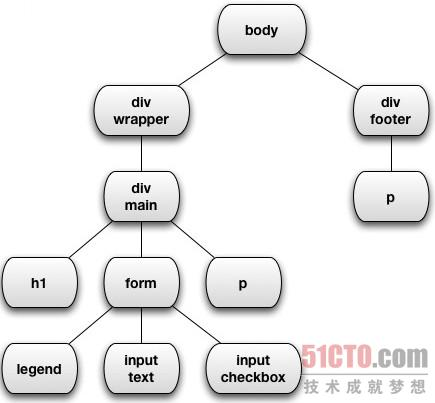

In [ ]:
#重新以本课程中的内容来说明
for book in doc.items('.subject-item'):
#     print(type(book))   # 有20本
    print(book)       # 查看这20本书的信息

### 情况1：直接解析

In [ ]:
for book in doc.items('.subject-item'):
#     print(book('.info'))     # 一层层定位，找到最具体的标签定位
#     print(book('.info h2'))
#     print(book('.info h2 a'))
#     print(book('.info h2 a').attr('title'))   #取书名的两种方式：一是通过attr方法
#     print(book('.info h2 a').text())          # 二是通过text方法，相对完整
    book_name = book('.info h2 a').text()     # 放入book_name字段中
    print(book_name)

In [ ]:
# 用类似方法的字段有：book_name, desc, score, img
for book in doc.items('.subject-item'):
    book_name = book('.info h2 a').text()
    desc = book('.info p').text()
    score = book('.rating_nums').text()
    img = book('.pic a img').attr('src')
    print(book_name, desc, score, img)

### 情况2：提取列表元素

In [ ]:
for book in doc.items('.subject-item'):
#     info_list = book('.info .pub').text()    # 用左下划线'/'分隔的字符串
#print(info_list)
    info_list = book('.info .pub').text().split('/')     
# .split('/')：这部分代码将提取到的文本内容按照'/'字符进行分割，得到一个列表info_list。这个列表包含了由'/'分隔的多个字符串元素。
#print(info_list)
#     print(info_list[-3])    # 用[]提取列表元素，例如倒数第3个是出版社，索引为-3
    publisher = info_list[-3].strip()   # 以同样的方式获得authors, publisher, pub_time, price字段
#.strip()：这部分代码去除出版社名称字符串两侧的空白字符（如空格、换行符等）。
#     print(publisher)
    pub_time = info_list[-2]
    price = info_list[-1]
    authors = ','.join(info_list[:-3])   # 将多个作者元素，组合到一个字符串里
#','.join(...)：这部分代码将获取到的作者名称列表用逗号,连接起来，形成一个单独的字符串。
#     print(authors)
print(authors, publisher, pub_time, price)

### 情况3：正则表达式提取

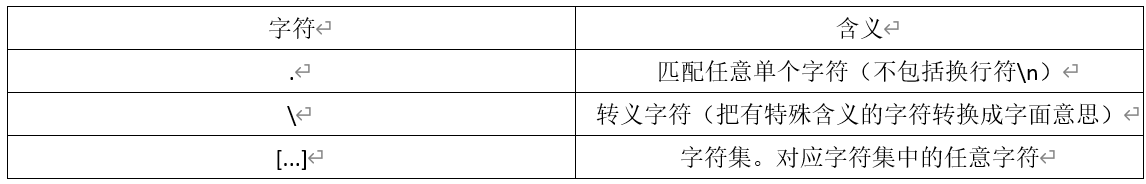

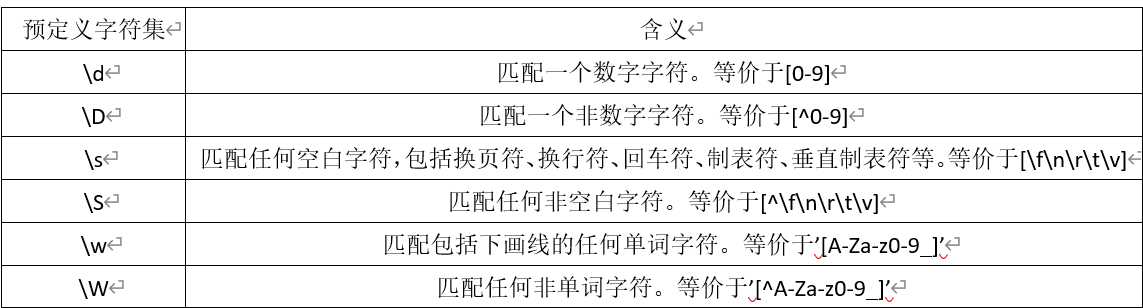

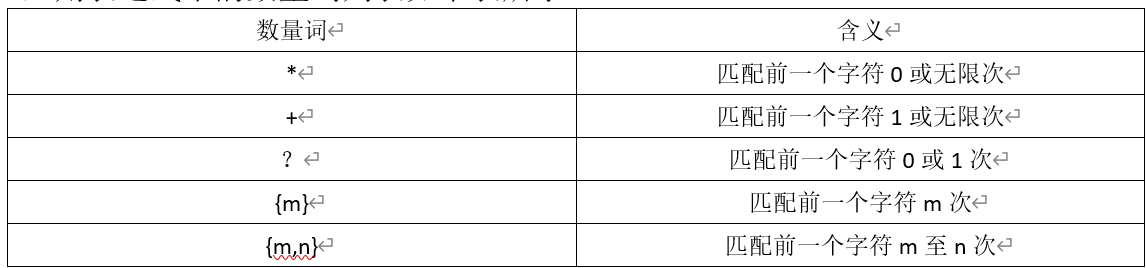

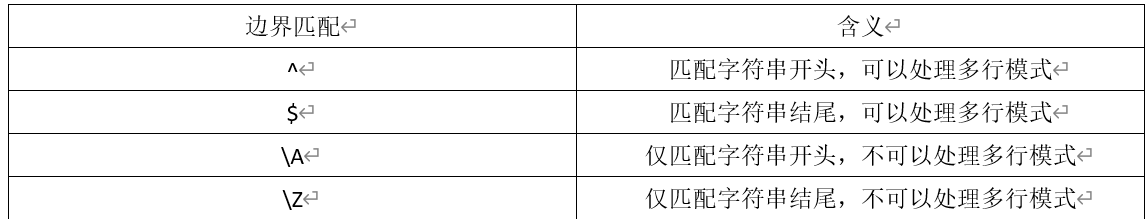

In [ ]:
import re    # 导入re包，这是基础包，不用下载

for book in doc.items('.subject-item'):
    people_num_raw = book('.pl').text()
#print(people_num_raw)
print(re.findall('[0-9]+', people_num_raw))    # 匹配people_num_raw字段中的数字，获得列表
#     print(re.findall('[0-9]+', people_num_raw)[0])   # 取列表中的第1个元素，索引为0
#    people_num = re.findall('[0-9]+', people_num_raw)[0]  # 放入people_num字段中
#    print(people_num)

1. 将这些**```字段组合成字典，放入列表```**中
2. 书名、作者、出版社等作为**```key```**，人类简史、尤瓦尔·赫拉利、中信出版社等作为**```value```**
3. **```例子```**如下：

In [ ]:
bookinfo_list_tmp = [
    {'book_name': '人类简史：从动物到上帝', 'author': '尤瓦尔·赫拉利', 'publisher': '中信出版社'},
    {'book_name': '理想国', 'author': '柏拉图', 'publisher': '商务印书馆'},
    {'book_name': '社会契约论', 'author': '卢梭', 'publisher': '商务印书馆'}
    ]
#以上创造了一个包含3个字典的列表。
print(bookinfo_list_tmp)
print('数据类型为：',type(bookinfo_list_tmp))   # 类型为list
print('数据长度为：',len(bookinfo_list_tmp))    # 长度为3，即3本书的信息

In [ ]:
bookinfo_list = []   # 生成空列表，用于存储书籍信息
doc = PyQuery(html)
for book in doc.items('.subject-item'):
    book_name = book('.info h2 a').text()    # 情况1：直接解析
    desc = book('.info p').text()
    score = book('.rating_nums').text()
    img = book('.pic a img').attr('src')
    
    info_list = book('.info .pub').text().split('/')    # 情况2：提取列表元素
    publisher = info_list[-3].strip()   
    pub_time = info_list[-2]
    price = info_list[-1]
    authors = ''.join(info_list[:-3]) 
    
    people_num_raw = book('.pl').text()       # 情况3：正则表达式提取
    people_num = re.findall('[0-9]+', people_num_raw)[0]
    
    bookinfo = {'book_name':book_name,   # 为每本书创建一个字典，不同字段建构不同键值对
                 'authors':authors,
                 'publisher':publisher,
                 'pub_time':pub_time,
                 'desc':desc,
                 'score':score,
                 'people_num':people_num,
                 'price':price,
                 'img':img
                }
    
    bookinfo_list.append(bookinfo)      # 将字典添加进bookinfo_list列表中

In [ ]:
bookinfo_list
# len(bookinfo_list)

In [ ]:
# 函数：解析数据  extract_bookinfo_list(html)
# 参数说明：html为网页源代码的字符串
# 返回值：bookinfo_list为书籍的字典列表
def extract_bookinfo_list(html):         # 添加：定义函数名
    bookinfo_list = []
    doc = PyQuery(html)
    for book in doc.items('.subject-item'):
        try:                             # 添加：try语句，避免特殊网页中断整个循环。后跟except语句，用来防止因出现特殊情况，而导致的循环崩溃。
            book_name = book('.info h2 a').text()    
            desc = book('.info p').text()
            score = book('.rating_nums').text()
            img = book('.pic a img').attr('src')
            info_list = book('.info .pub').text().split('/')    
            publisher = info_list[-3].strip()   
            pub_time = info_list[-2]
            price = info_list[-1]
            authors = ''.join(info_list[:-3])
            people_num_raw = book('.pl').text()       
            people_num = re.findall('[0-9]+', people_num_raw)[0]

            bookinfo = {'book_name':book_name,
                         'authors':authors,
                         'publisher':publisher,
                         'pub_time':pub_time,
                         'desc':desc,
                         'score':score,
                         'people_num':people_num,
                         'price':price,
                         'img':img
                        }

            bookinfo_list.append(bookinfo)
        except:                        # 添加：except和pass语句，如果碰到bug，那么跳出此次循环、不执行任何操作，进行下一次循环
            pass
        
    return bookinfo_list               # 添加：返回书籍的字典列表

In [ ]:
html

In [ ]:
# 调用函数extract_bookinfo_list(html)
bookinfo_list = extract_bookinfo_list(html)
print(bookinfo_list)
print('书籍数量为：', len(bookinfo_list))

# 存储数据

In [ ]:
import csv     # 导入csv包

# 打开文件
file = open('books_philosophy.csv', 'a+', encoding='utf-8', newline='') # 文件名为books_philosophy.csv，模式为a+，如果已有文件，在末尾追加，如果没，则生成新文件；编码为utf-8，需要区分换行符
fieldnames = ['book_name', 'authors', 'publisher', 'pub_time', 'desc', 'score', 'people_num', 'price', 'img']  # 设置标题行fieldnames
writer = csv.DictWriter(file, fieldnames=fieldnames)    # 要求以字典的形式写入数据，fieldnames注明字典中键的名称，也就是书名、作者这些标题名
writer.writeheader()  # 将fieldnames设置的标题key写入首行

# 循环写入字典列表：因为有很多本书，需要一行行写入
for bookinfo in bookinfo_list:
    writer.writerow(bookinfo)  # 写入一行书籍信息
    
file.close() # 关闭文件

In [ ]:
import os
os.getcwd() 

In [ ]:
# 假设'output.csv'是你已经写入数据的CSV文件  
with open('books_philosophy.csv', 'r', encoding='utf-8-sig') as file:  # 使用正确的编码打开文件  
    reader = csv.DictReader(file)  # 使用DictReader来读取CSV文件，它将每行数据转换为字典  
    for row in reader:  # 遍历CSV文件的每一行  
        print(row)  # 打印当前行的字典表示

In [ ]:
import pandas as pd  
# 将字典列表转换为DataFrame  
df = pd.DataFrame(bookinfo_list)  

In [ ]:
print(df.head())

In [ ]:
# 将DataFrame写入CSV文件  
df.to_csv('books_philosophy.csv', encoding='utf-8-sig', index=False)

# 批量爬取

刚才我们做了几项工作：
1. 生成网址————发现网址规律，获得所有网址url_list
2. 请求+获取网页数据————获得html网页源代码字符串（**单个网址**）
3. 解析数据————从html中获得书籍的各字段信息，存储为字典列表（**单个网址**）
4. 存储数据（**单个网址**）
<br>
<br>
<br>
<b><mark>下面对所有网址url_list循环步骤2-4</mark><b>

|**步骤**|任务|函数|输入参数|返回值|
|:----:|:-----|:-----|:-----|:-----|
|1|生成网址|generate_url_list()|--|url_list网址列表|
|**<mark>2</mark>**|**<mark>请求+获取网页数据</mark>**|get_html(url)|单个网址|html网页源代码的字符串|
|**<mark>3</mark>**|**<mark>解析数据</mark>**|extract_bookinfo_list(html)|（单个网址）html网页源代码的字符串|bookinfo_list书籍的字典列表|
|**<mark>4</mark>**|**<mark>存储数据</mark>**|--|--|--|
|5|批量爬取|--|--|--|

    为方便讲解，此处爬取5页作为例子（range中数字改为6）

In [ ]:
# 生成5页的网址url_list
url_list = []
template = 'https://book.douban.com/tag/哲学?start={num}&type=T'
for p in range(1,6):   # range取1到5
    url = template.format(num=(p-1)*20)
    url_list.append(url)
url_list

In [ ]:
# 打开文件
file = open('books_philosophy.csv', 'a+', encoding='utf-8-sig', newline='') 
fieldnames = ['book_name', 'authors', 'publisher', 'pub_time', 'desc', 'score', 'people_num', 'price', 'img'] 
writer = csv.DictWriter(file, fieldnames=fieldnames)    
writer.writeheader() 

# 对所有网址url_list循环步骤2-4
for url in url_list:
    
    html = get_html(url)       # 【步骤2：得到html数据，用函数get_html(url)】
    
    bookinfo_list = extract_bookinfo_list(html)  # 【步骤3：整理成结构化数据，用函数extract_bookinfo_list(html)】
    
    for bookinfo in bookinfo_list:      # 【步骤4：写数据到csv文件】
        writer.writerow(bookinfo)
    
file.close() # 关闭文件

In [ ]:
# 函数：爬虫主函数  main(filename)
# 参数说明：filename为文件名称
# 仅执行命令，不返回任何值
def main(filename):         # 添加：定义函数名
    print('开始采集豆瓣哲学类书籍！')              # 添加：说明“开始采集豆瓣哲学类书籍！”
    
    # 生成所有网址url_list
    url_list = generate_url_list()
    
    # 打开文件
    file = open(filename, 'a+', encoding='utf-8-sig', newline='')     # 修改：将文件名称，设定为函数的参数
    fieldnames = ['book_name', 'authors', 'publisher', 'pub_time', 'desc', 'score', 'people_num', 'price', 'img'] 
    writer = csv.DictWriter(file, fieldnames=fieldnames)    
    writer.writeheader() 

    # 对所有网址url_list循环步骤2-4
    for url in url_list:
        print('正在采集：{url}'.format(url=url))    # 添加：说明“正在采集<url>”
        html = get_html(url)
        bookinfo_list = extract_bookinfo_list(html)
        for bookinfo in bookinfo_list:
            writer.writerow(bookinfo)

    file.close()

    print('采集完毕！')            # 添加：说明“采集完毕！”

- 修改函数generate_url_list()：
    1. 原情况：一次性爬取50页网址，且只能爬取哲学类书籍
    2. 任务：**灵活地设置页数，书籍类型**

In [ ]:
# 新函数：生成网址  generate_url_list(categ, max_page)
# 参数说明：categ为书籍类型，max_page为最大页数
# 返回值：url_list为网址列表
def generate_url_list(categ, max_page):   # 添加：加入参数categ和max_page
    url_list = []
    template = 'https://book.douban.com/tag/{categ}?start={num}&type=T'   # 修改：哲学替换成{categ}
    for p in range(1,max_page+1):        # 修改：51替换成max_page+1
        url = template.format(categ=categ, num=(p-1)*20)       # 添加：加入参数categ，用来搜集不同类别的书籍
        url_list.append(url)
    return url_list

**<big>主函数也相应修改</big>**

In [ ]:
# 函数：爬虫主函数  main(categ, max_page, filename)
# 参数说明：categ为书籍类型，max_page为最大页数，filename为文件名称
# 仅执行命令，不返回任何值
def main(categ, max_page, filename):         # 添加：加入参数categ和max_page
    print('开始采集豆瓣{categ}类书籍！'.format(categ = categ))              # 修改：哲学替换成{categ}”
    
    # 生成所有网址url_list
    url_list = generate_url_list(categ, max_page)       # 添加：加入参数categ和max_page
    
    # 打开文件
    file = open(filename, 'a+', encoding='utf-8-sig', newline='')   #'a+'模式允许你向文件添加(append)新的内容，同时也可以读取文件的内容
    fieldnames = ['book_name', 'authors', 'publisher', 'pub_time', 'desc', 'score', 'people_num', 'price', 'img'] 
    writer = csv.DictWriter(file, fieldnames=fieldnames)    
    writer.writeheader() 

    # 对所有网址url_list循环步骤2-4
    for url in url_list:
        print('正在采集：{url}'.format(url=url))
        html = get_html(url)
        bookinfo_list = extract_bookinfo_list(html)
        for bookinfo in bookinfo_list:
            writer.writerow(bookinfo)

    file.close()

    print('采集完毕！')

豆瓣图书类型汇总：https://book.douban.com/tag/?view=type&icn=index-sorttags-hot#文学

In [ ]:
# 调用函数main(categ, max_page, filename)
main(categ='哲学', max_page=10, filename='books_philosophy_3.csv')

main(categ='漫画', max_page=10, filename='output/books_comic_10.csv')

In [ ]:
main(categ='电影', max_page=10, filename='books_movie_2.csv')

<center><big><b>END</b></big></center>